In [11]:
import torchaudio
from speechbrain.pretrained import EncoderClassifier
import pandas as pd
import seaborn as sn
from sklearn import metrics
from datetime import datetime

In [2]:
province_code = EncoderClassifier.from_hparams(
    source="pretrained-model-src", 
    savedir="pretrained-model-save"
)

In [3]:
signal = province_code.load_audio("/data/MTDATA/fn-2-018/root/person/st/gw/collectorgw88/st_set1_collectorgw88_speakergw407_8_11.wav")
prediction =  province_code.classify_batch(signal)
print(prediction)

(tensor([[-0.4944, -6.7405, -1.9360, -5.7810, -1.4209]]), tensor([-0.4944]), tensor([0]), ['gw: 강원'])


In [ ]:
signal = province_code.load_audio("/data/MTDATA/fn-2-018/root/person/st/gs/collectorgs31/st_set2_collectorgs31_speakergs98_68_6.wav")
prediction =  province_code.classify_batch(signal)
print(prediction)

In [ ]:
signal = province_code.load_audio("/data/MTDATA/fn-2-018/root/person/st/jl/collectorjl20/st_set3_collectorjl20_speakerjl218_31_12.wav")
prediction =  province_code.classify_batch(signal)
print(prediction)

In [ ]:
signal = province_code.load_audio('/data/MTDATA/fn-2-018/root/person/st/jj/collectorjj10/st_set1_collectorjj10_speakerjj13_81_10.wav')
prediction =  province_code.classify_batch(signal)
print(prediction)

In [ ]:
signal = province_code.load_audio('/data/MTDATA/fn-2-018/root/person/st/cc/collectorcc46/st_set1_collectorcc46_speakercc308_46_7.wav')
prediction =  province_code.classify_batch(signal)
print(prediction)

In [ ]:
print(prediction[1].exp())

In [ ]:
print(prediction[3])

In [ ]:
emb =  province_code.encode_batch(signal)

In [ ]:
print(emb.shape)

In [4]:
test_data = '../classifier_data/test.csv'
test_df = pd.read_csv(test_data)
test_df = test_df[['wav', 'province_code']]

In [ ]:
test_df

In [5]:
province_code_list = ['gw', 'gs', 'jl', 'jj', 'cc']

In [ ]:
province_code_list.index('jj')

In [6]:
test_df['province_id'] = test_df.apply(lambda x : province_code_list.index(x['province_code']), axis=1)

In [ ]:
test_df

In [7]:
def get_province_id(file):
    signal = province_code.load_audio(file)
    prediction =  province_code.classify_batch(signal)
    return int(prediction[2])

In [12]:
start_time = datetime.now()
test_df['hyp'] = test_df.apply(lambda x : get_province_id(x['wav']), axis=1)
datetime.now() - start_time

datetime.timedelta(seconds=39, microseconds=961861)

In [ ]:
test_df

In [13]:
confusion_matrix = pd.crosstab(test_df['province_id'], test_df['hyp'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted   0    1    2    3    4
Actual                           
0          67   39   23   30   21
1           2  155   13    3    7
2           6    6  130   18   20
3           2    1    0  173    4
4           4    4   21   10  141


In [ ]:
confusion_matrix.columns

In [ ]:
confusion_matrix.describe            

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

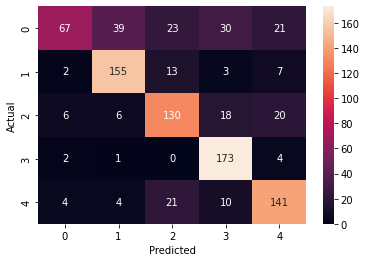

In [14]:
sn.heatmap(confusion_matrix, annot=True, fmt="d")

In [15]:
Accuracy = metrics.accuracy_score(test_df['province_id'], test_df['hyp'])
Accuracy

0.74